Task 1: Youtube Streamer Analysis

INTRODUCTION

This dataset contains valuable information about the top YouTube streamers, including their ranking, categories, subscribes, country, visits, likes, comments, and more. Your task is to perform a comprehensive analysis of the dataset to extract insights about the top YouTube content creators.

1. Data Exploration and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\Uzoma Peculiar\Desktop\DATA ANAYLSIS\PYTHON\peculiar\youtubers_df.csv")

In [2]:
# View the first few rows to understand the structure
print(df.head())

   Rank       Username           Categories   Suscribers         Country  \
0     1        tseries       Música y baile  249500000.0           India   
1     2        MrBeast   Videojuegos, Humor  183500000.0  Estados Unidos   
2     3      CoComelon            Educación  165500000.0         Unknown   
3     4       SETIndia                  NaN  162600000.0           India   
4     5  KidsDianaShow  Animación, Juguetes  113500000.0         Unknown   

        Visits      Likes  Comments  \
0      86200.0     2700.0      78.0   
1  117400000.0  5300000.0   18500.0   
2    7000000.0    24700.0       0.0   
3      15600.0      166.0       9.0   
4    3900000.0    12400.0       0.0   

                                               Links  
0  http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  
1  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
2  http://youtube.com/channel/UCbCmjCuTUZos6Inko4...  
3  http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...  
4  http://youtube.com/channel/UCk

In [3]:
# Get a summary of data types and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB
None


In [4]:
# Get descriptive statistics for numerical columns
print(df.describe())

              Rank    Suscribers        Visits         Likes       Comments
count  1000.000000  1.000000e+03  1.000000e+03  1.000000e+03    1000.000000
mean    500.500000  2.189440e+07  1.209446e+06  5.363259e+04    1288.768000
std     288.819436  1.682775e+07  5.229942e+06  2.580457e+05    6778.188308
min       1.000000  1.170000e+07  0.000000e+00  0.000000e+00       0.000000
25%     250.750000  1.380000e+07  3.197500e+04  4.717500e+02       2.000000
50%     500.500000  1.675000e+07  1.744500e+05  3.500000e+03      67.000000
75%     750.250000  2.370000e+07  8.654750e+05  2.865000e+04     472.000000
max    1000.000000  2.495000e+08  1.174000e+08  5.300000e+06  154000.000000


In [5]:
# Check for missing values across columns
print(df.isna().sum())

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64


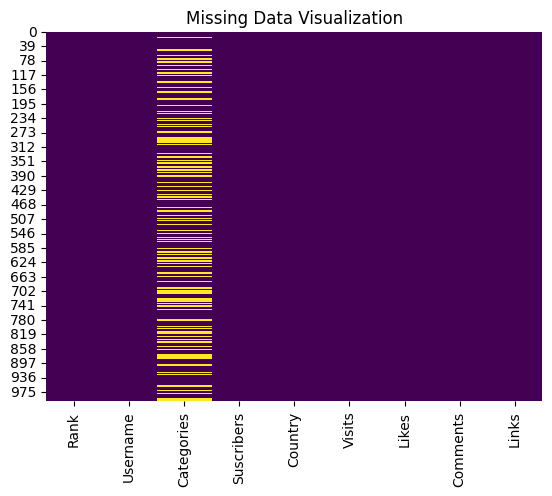

In [6]:
# Visualizing missing data (if needed)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Visualization")
plt.show()

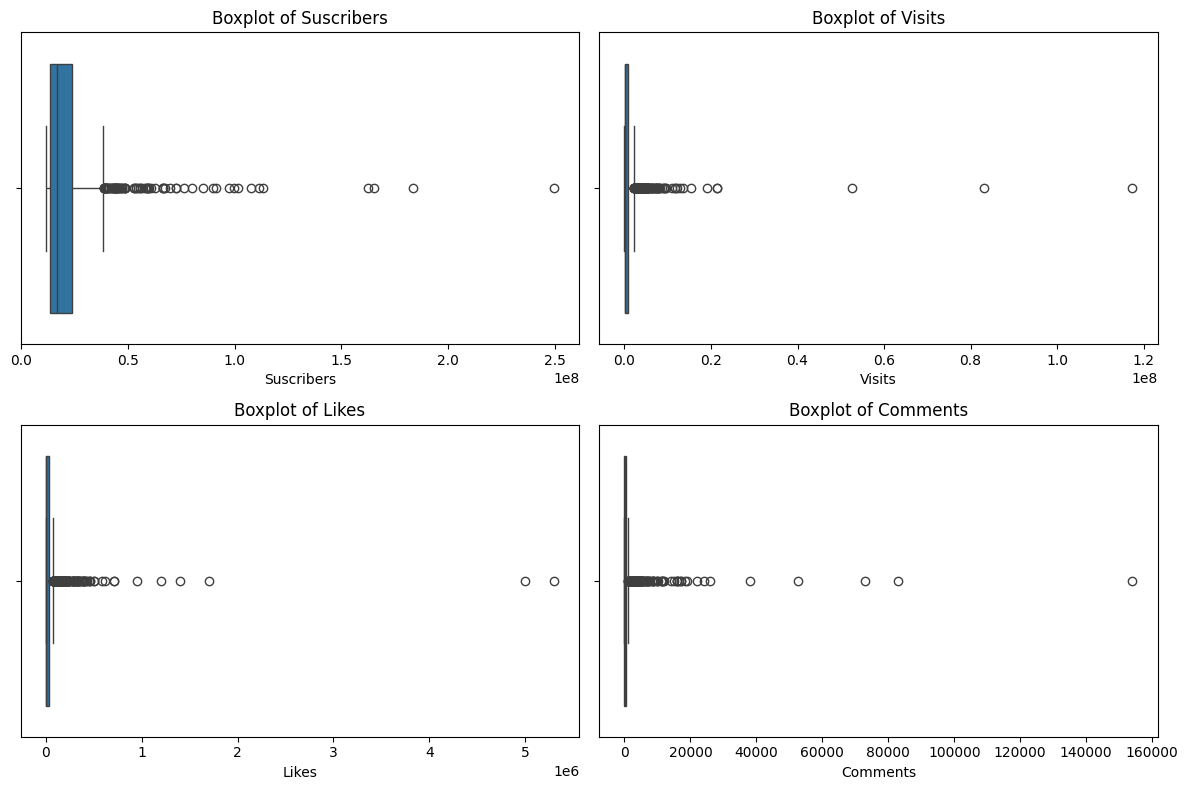

In [7]:
# Identify potential outliers using boxplots for key numerical columns
plt.figure(figsize=(12, 8))
numerical_cols = ['Suscribers', 'Visits', 'Likes', 'Comments']  # adjust these names based on your dataset
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

2. Trend Analysis

Identify trends among the top YouTube streamers. Which categories are the most popular?. Is there a correlation between the number of subscribers and the number of likes or comments?

C:\Users\Uzoma Peculiar\AppData\Local\Temp\ipykernel_14096\1560555328.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


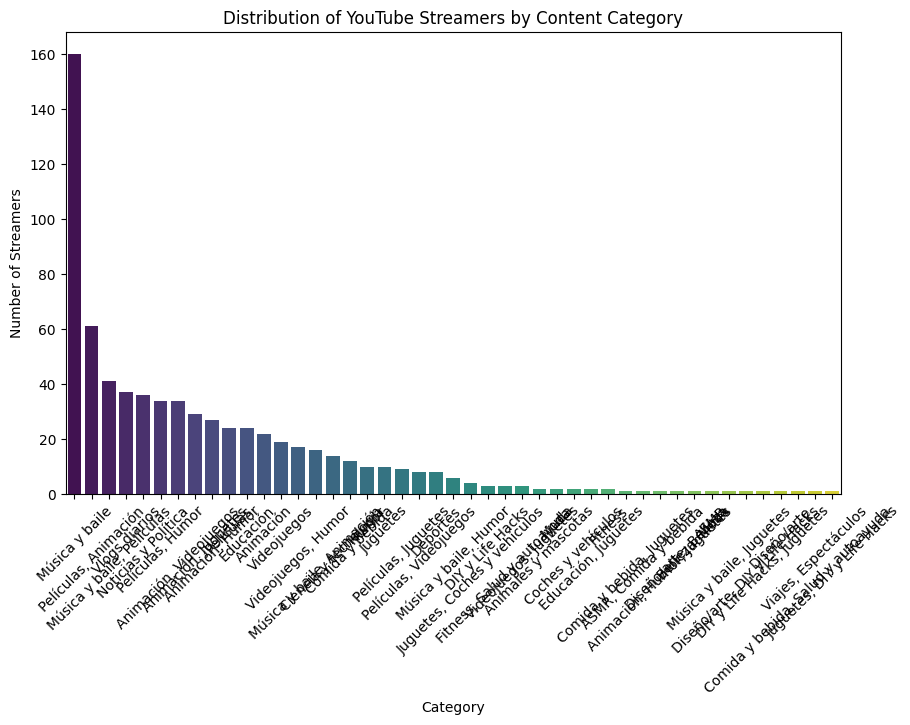

In [8]:
# Trend among top streamers
# Assuming there is a 'category' column indicating the content category
category_counts = df['Categories'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribution of YouTube Streamers by Content Category")
plt.xlabel("Category")
plt.ylabel("Number of Streamers")
plt.show()

Correlation Matrix:
            Suscribers     Likes  Comments
Suscribers    1.000000  0.211639  0.036350
Likes         0.211639  1.000000  0.325911
Comments      0.036350  0.325911  1.000000


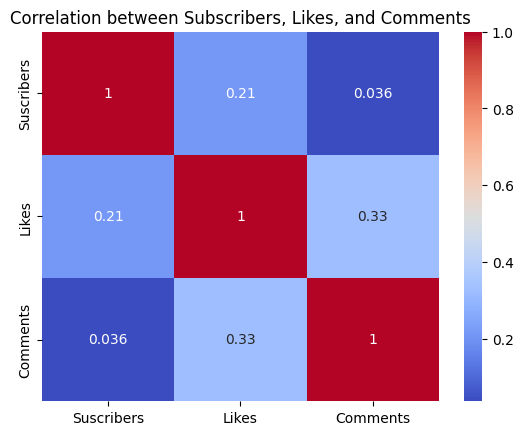

In [9]:
# Correlation between subscribers, likes, and comments
correlation_matrix = df[['Suscribers', 'Likes', 'Comments']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation between Subscribers, Likes, and Comments")
plt.show()

Observations

Interestingly, there is no evident correlation between the number of subscribes and likes, nor between suscribers and comments.

3. Audience Study

Analyze the distribution of streamers' audience by country. Are there regional preferences for specific content categoriess?

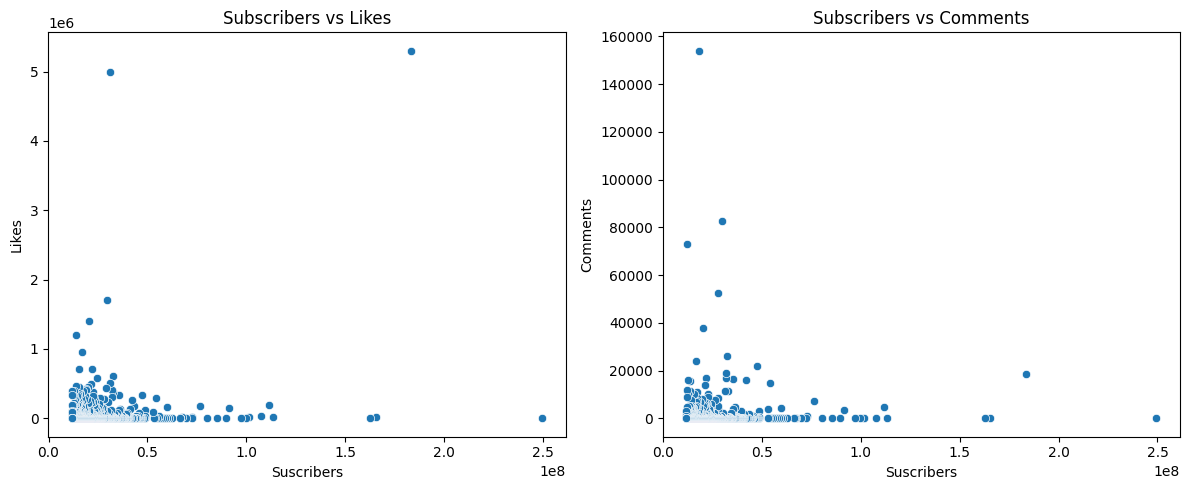

In [10]:
# Scatter plots to further illustrate relationships
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Suscribers', y='Likes')
plt.title("Subscribers vs Likes")
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Suscribers', y='Comments')
plt.title("Subscribers vs Comments")
plt.tight_layout()
plt.show()

C:\Users\Uzoma Peculiar\AppData\Local\Temp\ipykernel_14096\2154070165.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=audience_distribution.index, y=audience_distribution.values, palette="viridis")


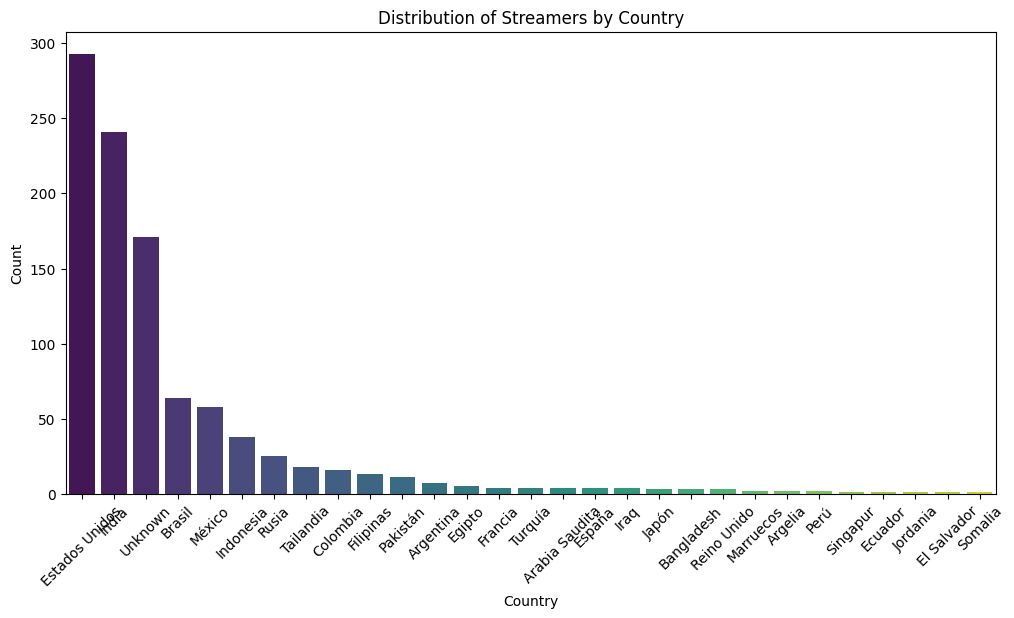

In [11]:
# Example: Assume there is an 'streamers_country' column that might contain a list or primary country per streamer
audience_distribution = df['Country'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=audience_distribution.index, y=audience_distribution.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribution of Streamers by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

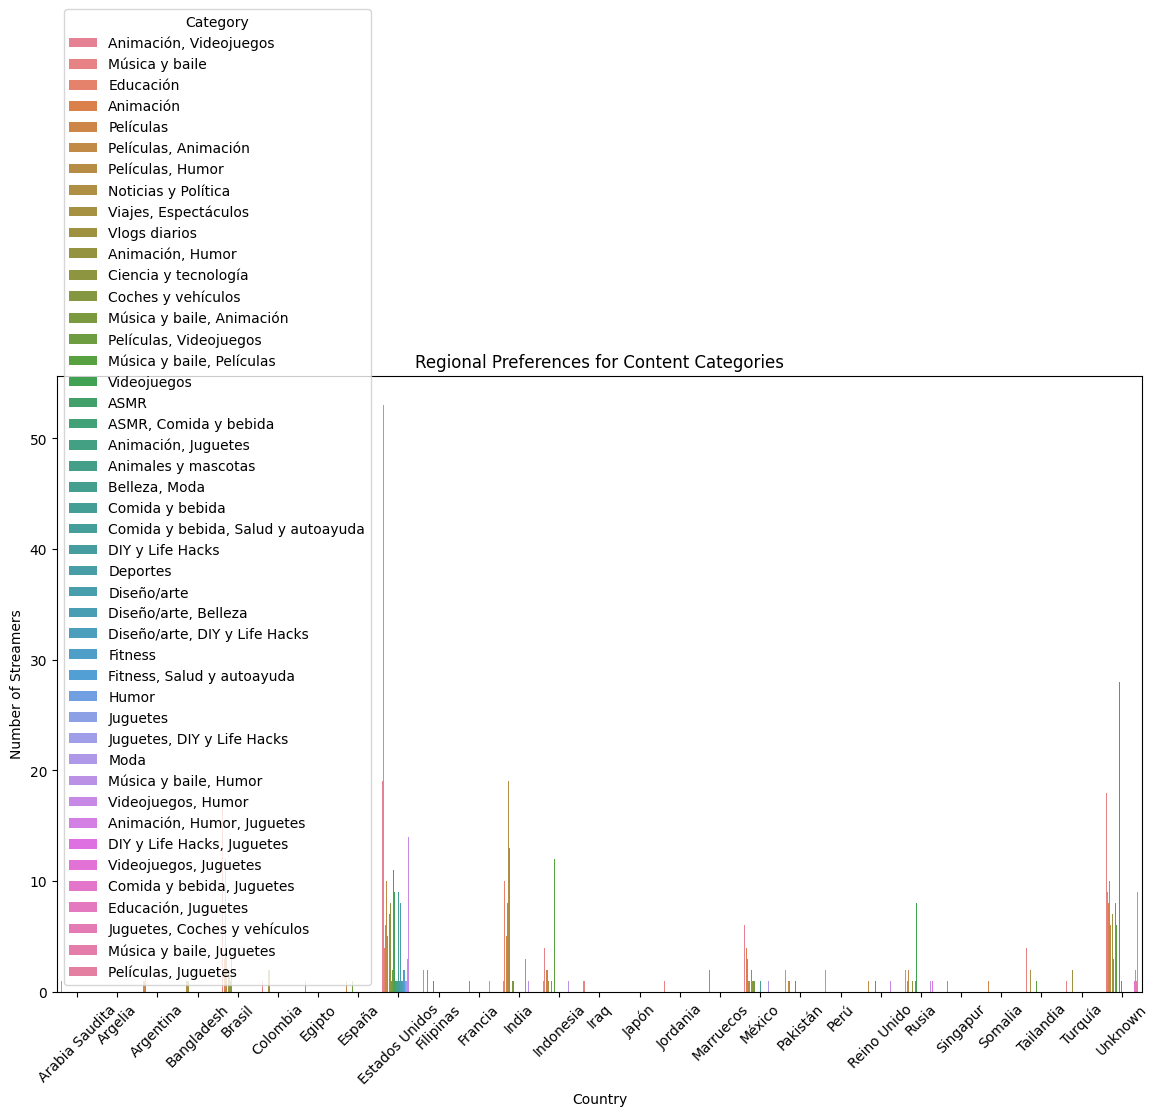

In [12]:
# Regional preferences for content categories
# This example assumes that each record has a single primary country and category.
region_category = df.groupby(['Country', 'Categories']).size().reset_index(name='counts')
plt.figure(figsize=(14,8))
sns.barplot(data=region_category, x='Country', y='counts', hue='Categories')
plt.xticks(rotation=45)
plt.title("Regional Preferences for Content Categories")
plt.xlabel("Country")
plt.ylabel("Number of Streamers")
plt.legend(title='Category')
plt.show()

4. Performance Metrics

Calculate and visualize the average number of subscribers, visits, likes, and comments.
Are there patterns or anomalies in these metrics?

In [13]:
# Calculate average performance metrics
avg_metrics = df[['Suscribers', 'Visits', 'Likes', 'Comments']].mean()
print("Average Performance Metrics:")
print(avg_metrics)

Average Performance Metrics:
Suscribers    2.189440e+07
Visits        1.209446e+06
Likes         5.363259e+04
Comments      1.288768e+03
dtype: float64


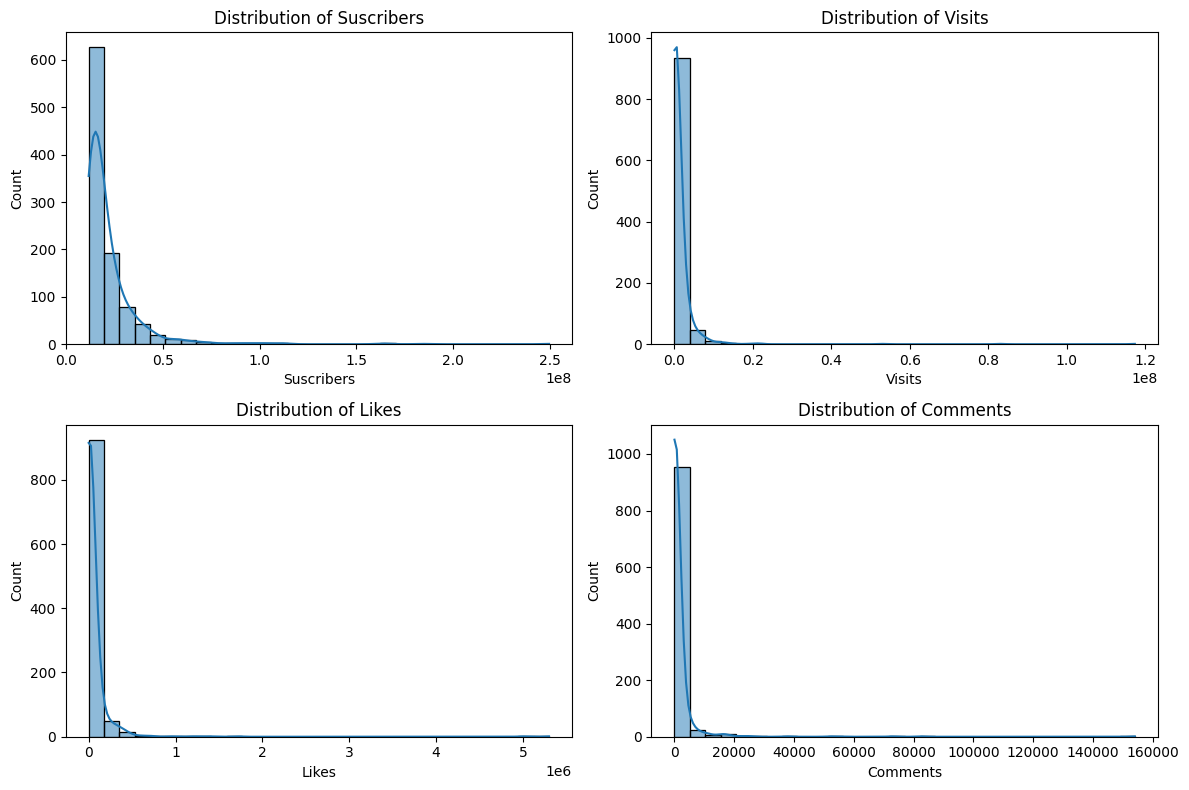

In [14]:
# Visualize the distribution of each performance metric
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Boxplots for anomalies (already partly addressed in the data exploration)

C:\Users\Uzoma Peculiar\AppData\Local\Temp\ipykernel_14096\1658824020.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Categories', order=df['Categories'].value_counts().index, palette="viridis")


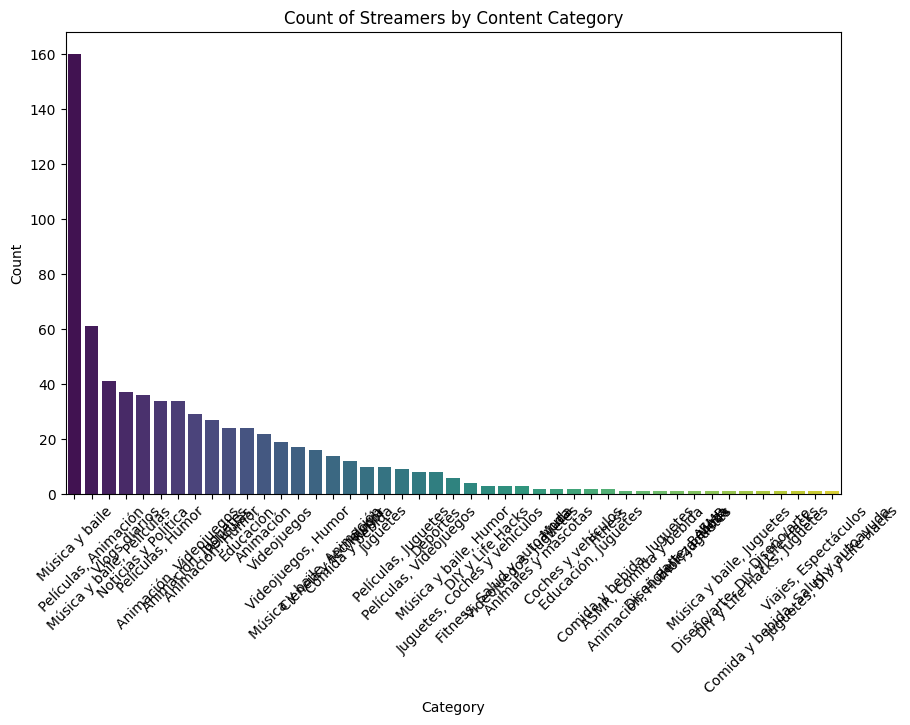

In [15]:
# Distribution of content categories
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Categories', order=df['Categories'].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Count of Streamers by Content Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

5. Content Categories

Explore the distribution of content categories. Which categories have the highest number of streamers?
Are there specific categories with exceptional performance metrics?

In [16]:
# Average performance metrics per category
category_metrics = df.groupby('Categories')[['Suscribers', 'Visits', 'Likes', 'Comments']].mean().sort_values(by='Suscribers', ascending=False)
print("Average Performance Metrics by Category:")
print(category_metrics)

Average Performance Metrics by Category:
                                      Suscribers        Visits          Likes  \
Categories                                                                      
Juguetes                            3.788000e+07  7.005100e+05    5290.200000   
Películas, Videojuegos              3.325000e+07  6.940375e+05   48083.375000   
Animación, Juguetes                 2.937586e+07  5.254483e+05    2653.068966   
Videojuegos, Humor                  2.876471e+07  1.023968e+07  420511.764706   
Música y baile                      2.683688e+07  3.743881e+05   17405.681250   
Diseño/arte, DIY y Life Hacks       2.570000e+07  2.600000e+06  127300.000000   
Educación                           2.501250e+07  1.106042e+06   45060.750000   
Videojuegos                         2.498421e+07  1.387137e+06   57121.052632   
Videojuegos, Juguetes               2.473333e+07  5.741667e+05    6400.000000   
Belleza, Moda                       2.390000e+07  9.645000e+05   623

C:\Users\Uzoma Peculiar\AppData\Local\Temp\ipykernel_14096\1643134277.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_metrics.index, y=category_metrics['Suscribers'], palette="viridis")


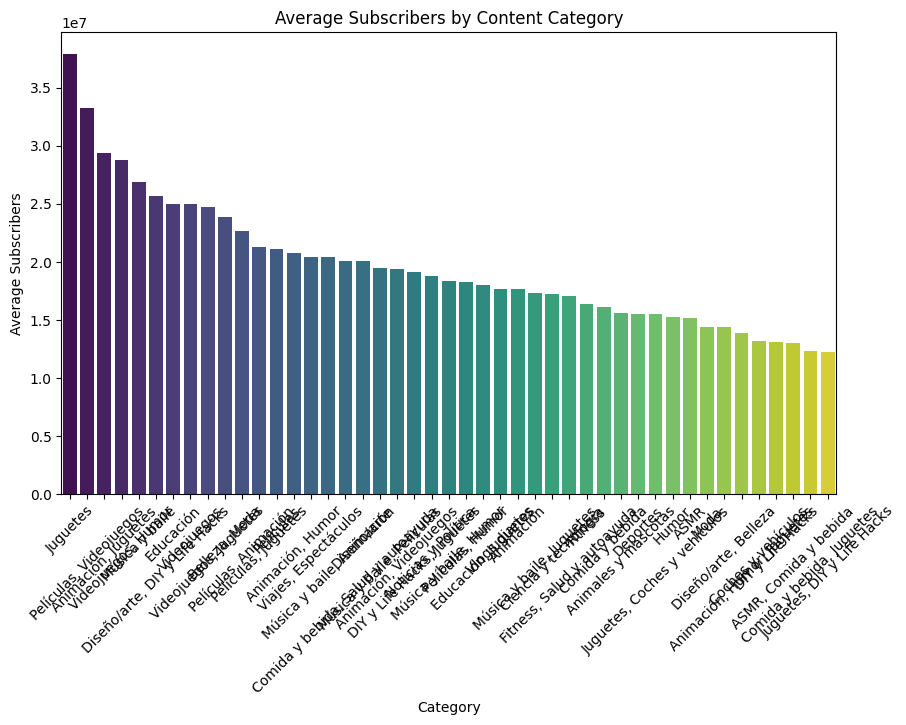

In [17]:
# Visualize the metrics per category (example for subscribers)
plt.figure(figsize=(10,6))
sns.barplot(x=category_metrics.index, y=category_metrics['Suscribers'], palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Subscribers by Content Category")
plt.xlabel("Category")
plt.ylabel("Average Subscribers")
plt.show()

6. Brands and Collaborations

Analyze whether streamers with high performance metrics receive more brand collaborations and marketing campaigns.

Data on brand collaboration and marketing campaigns was not provided. To analyze whether high performance streamers have more brand collaborations or marketing campaigns, you'd need additional data or columns indicating brand collaborations. This could involve integrating columns related to brand partnerships or collaboration counts for each streamer in the dataset.

7. Benchmarking

Identify streamers with above-average performance in terms of subscribers, likes, visits and comments.
Who are the top-performing content creators?

In [18]:
# Calculate overall average metrics (reusing avg_metrics)
# Create a boolean filter for above-average performance
benchmark_filter = (
    (df['Suscribers'] > avg_metrics['Suscribers']) & 
    (df['Visits'] > avg_metrics['Visits']) & 
    (df['Likes'] > avg_metrics['Likes']) & 
    (df['Comments'] > avg_metrics['Comments'])
)
top_streamers = df[benchmark_filter]
print("Top-performing Streamers (above average in subscribers, visits, likes, and comments):")
print(top_streamers[['Username', 'Suscribers', 'Visits', 'Likes', 'Comments']])  # adjust column name for streamer

Top-performing Streamers (above average in subscribers, visits, likes, and comments):
                  Username   Suscribers       Visits      Likes  Comments
1                  MrBeast  183500000.0  117400000.0  5300000.0   18500.0
5                PewDiePie  111500000.0    2400000.0   197300.0    4900.0
26             dudeperfect   59700000.0    5300000.0   156500.0    4200.0
34             TaylorSwift   54100000.0    4300000.0   300400.0   15000.0
39             JuegaGerman   48600000.0    2000000.0   117100.0    3000.0
43                A4a4a4a4   47300000.0    9700000.0   330400.0   22000.0
58               Mikecrack   43400000.0    2200000.0   183400.0    1800.0
62          KimberlyLoaiza   42100000.0    5300000.0   271300.0   16000.0
64         luisitocomunica   41100000.0    2500000.0   128900.0    1800.0
70             JessNoLimit   39600000.0    1300000.0    73500.0    1600.0
96          TotalGaming093   36300000.0    1500000.0   129400.0    4900.0
98    TechnoGamerzOfficial

In [19]:
# Alternatively, rank by subscribers or a composite score
df['composite_score'] = (df['Suscribers'] + df['Visits'] + df['Likes'] + df['Comments'])  # weight these as needed
top_ranked = df.sort_values(by='composite_score', ascending=False).head(10)
print("Top 10 Streamers by Composite Performance Score:")
print(top_ranked[['Username', 'composite_score']])

Top 10 Streamers by Composite Performance Score:
               Username  composite_score
1               MrBeast      306218500.0
0               tseries      249588978.0
2             CoComelon      172524700.0
3              SETIndia      162615775.0
136            MrBeast2      119411600.0
4         KidsDianaShow      117412400.0
5             PewDiePie      114102200.0
6    LikeNastyaofficial      110128000.0
7           VladandNiki      105522100.0
8       zeemusiccompany       99776932.0


In [21]:
df['Country'].value_counts()

Country
Estados Unidos    293
India             241
Unknown           171
Brasil             64
México             58
Indonesia          38
Rusia              25
Tailandia          18
Colombia           16
Filipinas          13
Pakistán           11
Argentina           7
Egipto              5
Francia             4
Turquía             4
Arabia Saudita      4
España              4
Iraq                4
Japón               3
Bangladesh          3
Reino Unido         3
Marruecos           2
Argelia             2
Perú                2
Singapur            1
Ecuador             1
Jordania            1
El Salvador         1
Somalia             1
Name: count, dtype: int64